In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pixiedust

%matplotlib inline

print("Libraries are loaded succesfully")

Pixiedust database opened successfully


Libraries are loaded succesfully


In [2]:
path_text_file = r"C:\Users\musta\Google Drive\A_Uni of Southampton Lessons\Self Study\Andrew NG Coursera\CourseraML-master\ex1\data\ex1data2.txt"

# 1. Load the data file

In [3]:
import csv

with open(path_text_file) as inf:
    reader = csv.reader(inf, delimiter=",")
    size = list(list(zip(*reader))[0])

with open(path_text_file) as inf:
    reader = csv.reader(inf, delimiter=",")
    number_bedrooms = list(list(zip(*reader))[1])
    
with open(path_text_file) as inf:
    reader = csv.reader(inf, delimiter=",")
    price = list(list(zip(*reader))[2])

# 2. Convert the cell types to float and transform them into matrices (initially they were in string format)

In [4]:
X1 = np.array(size).astype(np.float)
X2 = np.array(number_bedrooms).astype(np.float)
Y = np.array(price).astype(np.float)

# 3. Function to normalise the data

In [5]:
def normalizer(X):
    return (X - np.mean(X))/np.std(X)

X1_norm = X1.copy()
X2_norm = X2.copy()
Y_norm = Y.copy()

X1_norm = normalizer(X1_norm)
X2_norm = normalizer(X2_norm)
Y_norm = normalizer(Y_norm)

# 4. Visualise the independent variables against the dependent variable

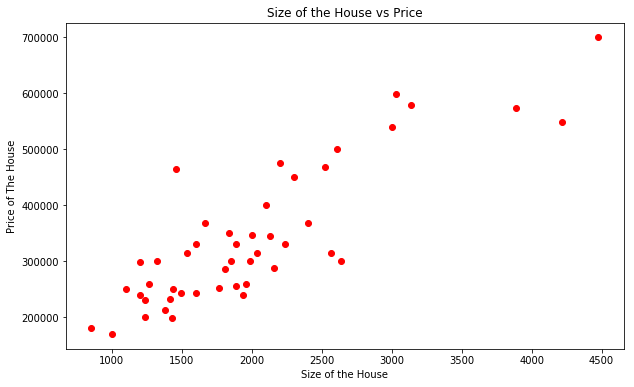

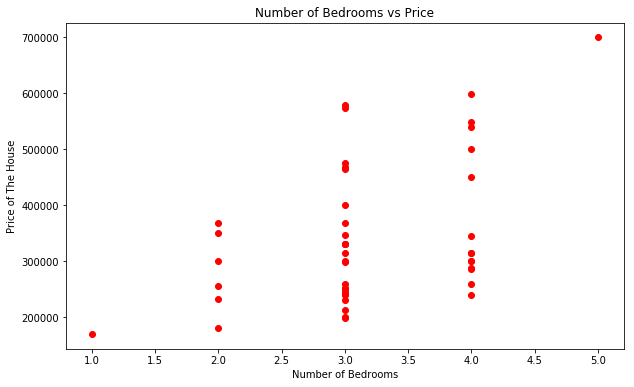

In [6]:
list_X = [X1,X2]
list_X_name = ["Size of the House","Number of Bedrooms"]
j=0

for i in list_X:
    plt.figure(figsize=(10,6))
    plt.scatter(i, Y, c="r")

    plt.title(list_X_name[j] + " vs Price")
    plt.xlabel(list_X_name[j])
    plt.ylabel("Price of The House");
    j += 1

# 5. Add theta_0 coefficients to the X matrix which is `1` and then merge the independent variables & the constant into same matrix 

In [7]:
theta_1_c = np.full((X1.shape[0]), 1)
X1_norm = np.concatenate((theta_1_c.reshape(-1,1), X1_norm.reshape(-1,1)), axis=1)
X_norm = np.concatenate((X1_norm, X2_norm.reshape(-1,1)), axis=1)

In [8]:
iterations = 1500
alpha = 0.01
m = X_norm.shape[0]

#  6. Define the Cost Function

In [9]:
def cost_function(X,Y,thetas = np.zeros(X_norm.shape[1])):

    h_theta_x =np.dot(X, thetas)

    return np.sum(((h_theta_x - Y)**2)/(m*2))

cost_function(X_norm,Y_norm)

0.49999999999999994

# 7. Define the Gradiend Descent function

In [10]:
def gradient_descent(X,Y,theta = np.zeros(X_norm.shape[1])):
    
    theta_list = []
    cost_function_values = []

    for i in range(iterations):
        h_theta_x =np.dot(X, theta)
        error = h_theta_x - Y
        
        cost_function_values.append(np.sum(((h_theta_x - Y)**2)/(m*2)))
        
        for j in range(theta.size):
            theta[j] = theta[j] - (alpha/m)*np.dot(error,X.transpose()[j]) # watch out for the transpose here.
            
        theta_list.append(list(theta)) #If you do not cast the theta values to a list, theta_list returns the wrong list.
        
    return theta_list, cost_function_values

theta_list, cost_function_values = gradient_descent(X_norm,Y_norm)

# 8. Multiply the X values with the calculated theta coefficients the calculate the  y_hat_norm

In [11]:
y_hat_norm = theta_list[-1]*X_norm
#y_hat_norm = np.sum(y_hat_norm, axis=1)

# 10. Plot the Cost Function against the Number of Iterations

Text(0,0.5,'Cost function')

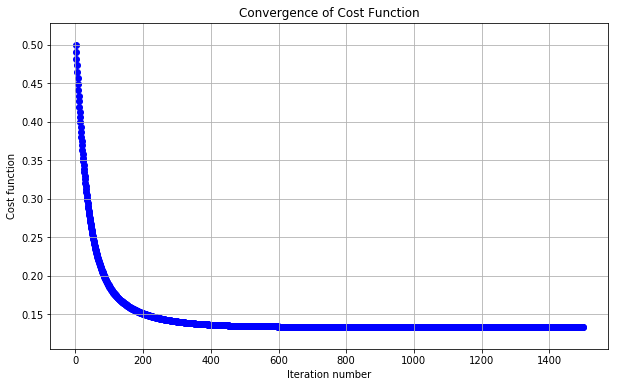

In [12]:
cost_function_values_a = np.array(cost_function_values)
iterations_a = np.array(range(1,1501))

plt.figure(figsize=(10,6))

plt.scatter(iterations_a, cost_function_values_a, c = "b")
plt.grid(True)
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")

# 11. Function that calculates the price of an unseen house

In [13]:
def calculate_new_entry():
    
    size_h = float(input("What is the size of the house? (in square feets): "))
    n_bedrooms = int(input("How many bedrooms are there in this house?: "))
    
    X1_test = (size_h-np.mean(X1))/np.std(X1)
    X2_test = (n_bedrooms-np.mean(X2))/np.std(X2)
    X0 = 1

    list_1 = [X0,X1_test,X2_test]
    X_test = np.asarray(list_1)

    a = np.sum(X_test*theta_list[-1])
    price = a * np.std(Y)+np.mean(Y)
    return print("\nThe price of the house that has {} bedrooms and is {} square feet is:$%8.2f".format(n_bedrooms,size_h) %price)

In [14]:
calculate_new_entry()

What is the size of the house? (in square feets): 1650
How many bedrooms are there in this house?: 3

The price of the house that has 3 bedrooms and is 1650.0 square feet is:$293098.56


# 12. Normal Equation Solution

In [15]:
X1 = np.array(size).astype(np.float)
X2 = np.array(number_bedrooms).astype(np.float)
theta_1_c = np.full((X1.shape[0]), 1)
Y = np.array(price).astype(np.float)

X1 = np.concatenate((theta_1_c.reshape(-1,1), X1.reshape(-1,1)), axis=1)
X = np.concatenate((X1, X2.reshape(-1,1)), axis=1)

In [16]:
from numpy.linalg import inv

def normEqtn(X,y,new_entry):
    theta_c = np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)
    return print("The price of the house is:$%8.2f" %np.sum(theta_c * new_entry))

In [17]:
ytest = [1,1650.,3]
normEqtn(X,Y,ytest)

The price of the house is:$293081.46
